# Introduction to CARDAMOM Files: Input, Output
This file is an introduction to the CARDAMOM carbon data assimilation frame work. CARDAMOM is a C-code package that can be downloaded from this git repository <>. CARDAMOM assimilates different data sources into a number of different, relatively simple, carbon cycle models described in the following literature:
1. Williams, M., Schwarz, P. A., Law, B. E., Irvine, J., & Kurpius, M. R. (2005). An improved analysis of forest carbon dynamics using data assimilation. Global Change Biology, 11(1), 89–105.

2. Bloom, A., & Williams, M. (2015). Constraining ecosystem carbon dynamics in a data-limited world: integrating ecological" common sense" in a model-data fusion framework. Biogeosciences, 12(5), 1299.

3. Bloom, A. A., Exbrayat, J.-F., van der Velde, I. R., Feng, L., & Williams, M. (2016). The decadal state of the terrestrial carbon cycle: Global retrievals of terrestrial carbon allocation, pools, and residence times. Proceedings of the National Academy of Sciences, 113(5), 1285–1290. https://doi.org/10.1073/pnas.1515160113

4. Quetin, G. R., Bloom, A. A., Bowman, K. W., & Konings, A. G. (2020). Carbon Flux Variability from a Relatively Simple Ecosystem Model with Assimilated Data is Consistent with Terrestrial Biosphere Model Estimates. Journal of Advances in Modeling Earth Systems. https://doi.org/10.1029/2019MS001889

5. Exbrayat, J., Smallman, T. L., Bloom, A. A., Hutley, L. B., & Williams, M. (2018). Inverse Determination of the Influence of Fire on Vegetation Carbon Turnover in the Pantropics. Global Biogeochemical Cycles. https://doi.org/10.1029/2018GB005925

6. Bloom, A. A., Bowman, K. W., Liu, J., Konings, A. G., Worden, J. R., Parazoo, N. C., et al. (2020). Lagged effects dominate the inter-annual variability of the 2010-2015 tropical carbon balance (preprint). Biogeochemistry: Land. https://doi.org/10.5194/bg-2019-459


To create an assimilation and output with CARDAMOM there are a few steps.
1. Build an input file (.cbf) that includes the meteorology to drive the carbon cycle model, which CARDAMOM model to use (see model options here <>), the observations with which to constrain the model (e.g. timeseries of LAI), and any other constraints on model paramters beyond the apriori limits set within the model itself (here: <>).
2. After an assimilation run, CARDAMOM will output an ensemble of parameters (.cbr file) that best match the constraints, both EDC (see reference <> above) and observations based on the cost function (can be found here <> in the CARDAMOM c-code base).
3. After an assimilation run, a forward run that uses the input file (.cbf) for driving meteorology and the parameter ensemble (.cbr) to create outputs of carbon and water pools (states) and carbon and water fluxes in (.bin files).

For more on how to run CARDAMOM in assimilation and forward modes, go to tutorial 2. With python scripts, this tutorial covers:

1. Description of input file (.cbf), open/view file
2. Open and view parameter output from assimilation runs (.cbr)
3. Open and view pools/fluxes from forward run (.bin).

In [1]:
## Import basic tools for reading and writing the binary format of CARDAMOM input and output files

# If you haven't yet installed the CARDAMOM utilities module, got to <> and type <> in the top folder

# Other import here for name lists?
import os
import sys
MACHDIR = os.path.expanduser("~")

# Point to where you have put the new scripts
dir_script = '../cardamom_utilities/readwritebinary'
sys.path.append(dir_script)


import readwritebinary as rwbin
import readcardamommodel


# define the directory where the test data is (require someone to input their home directory)
dirbinary = './data/inputoutput_point/' 

# By convention, CARDAMOM outputs are separate into a cbf (input) directory, 
# a cbr (parameters) directory, and an output directory
dir_cbf = dirbinary + 'cbf/'
dir_cbr = dirbinary + 'cbr/'
dir_output = dirbinary + 'output/'
    

    

## Description of the input file (.cbf), opening and viewing
The input file contains model settings, observational constraints, parameter constraints, and driving meteorology. Many of the model ideas can take the same .cbf but some have to be adjusted depending on where the parameters are in the list. There is ongoing work to create a new type of .cbf file where the inputs are all named in a netcdf and there is more flexibility in input.

Note: the 'nan' or 'empty' designator in the .cbf file is -9999.

In [2]:

# import the input data file
filename_cbf = 'test_1962.cbf'
filename_cbf_testout = 'testtest_1962.cbf'

file2load = dir_cbf + filename_cbf

# This function loads the binary .cbf file into a python directory
cbf_load = rwbin.read_cbf_file(file2load)

# Show cbf file
cbf_load.keys()

# write same cbf file back to folder


dict_keys(['OTHER_OBS', 'ID', 'OBSUNC', 'EDCDIAG', 'MET', 'OBS', 'OBSinfo', 'rc_random_search', 'LAT', 'nomet', 'PARPRIORUNC', 'PARPRIORS', 'RAW', 'noobs', 'EDC', 'nodays'])

### Description of cbf fields

* OBSinfo
* PARPRIORS
    + The order of these values are the same as those of the model parameter file
* PARPRIORUNC
    + The order of these values are the same as those of the model parameter file
* LAT
* EDCDIAG
* OBSUNC
* MET
* EDC
* ID
* nomet
* RAW
    + Otherpriors, be careful to check constraints, this is being phased out.
* noobs
* OBS
* OTHER_OBS
* rc_random_search
* nodays

In [3]:
# The cbf file contains driving meteorology (MET), settings for CARDAMOM, and constraining data (OBS).
cbf_load

{'EDC': 1.0,
 'EDCDIAG': 1.0,
 'ID': 809.0,
 'LAT': -18.0,
 'MET': array([[-1.46000000e+03,  2.42587738e+01,  3.65961609e+01, ...,
          1.82181238e-04,  1.55011649e+01,  9.88464042e+00],
        [-1.42900000e+03,  2.60227356e+01,  3.48720398e+01, ...,
          2.42360238e-06,  1.30642242e+01,  4.74883404e+00],
        [-1.40100000e+03,  2.22281647e+01,  3.81643372e+01, ...,
          2.31828065e-03,  1.87742519e+01,  1.85161296e+00],
        ...,
        [ 5.75300000e+03,  2.16517792e+01,  3.97907104e+01, ...,
          0.00000000e+00,  2.68250265e+01,  9.20946779e-02],
        [ 5.78400000e+03,  2.57582703e+01,  4.06973572e+01, ...,
          2.18941132e-04,  2.77083502e+01,  1.07673237e+00],
        [ 5.81400000e+03,  2.54252167e+01,  3.90185394e+01, ...,
          0.00000000e+00,  2.43232546e+01,  1.71135216e+00]]),
 'OBS': {'ABGB': [],
  'BAND1': [],
  'BAND2': [],
  'BAND3': [],
  'BAND4': [],
  'ET': [],
  'EWT': [],
  'GPP': array([-9.99900000e+03, -9.99900000e+03, -9.9990

In [4]:
# Most models have 9 driving met vectors
cbf_load['MET'].shape

(240, 9)

In [5]:
# In order the vectors are:
cbflabels = readcardamommodel.cbflabels()

print(os.linesep.join(cbflabels))


Time [Days since Jan 01, 2001]
min temp [C]
max temp [C]
Solar irradiance [MJ/m2/day]
CO2
Day of year
Burned area [m2/m2]
VPD [hPa]
Precip. [mm/day]


In [6]:
# Plot of the meteorological file
import matplotlib.pyplot as plt

# Choose a met driver from the list to plot
met_name = 'min temp [C]'
plt_data = cbf_load['MET'][:,cbflabels.index(met_name)]

# Plot met driver
fig, ax = plt.subplots(1,1)
ax.plot(plt_data)
ax.set_xlabel('time (months)')
ax.set_ylabel(met_name)
ax.set_title(met_name)

# Can also use cbf-check script to check the .cbf file


Text(0.5, 1.0, 'min temp [C]')

## Description of the parameter file (.cbr), opening and viewing
The parameter file contains a set of model parameters for every CARDAMOM ensemble.

In [7]:
# import the parameter data file (output from CARDAMOM assimilation)
filename_cbr = 'test_1962_0.cbr'
filename_cbr_testout = 'testtest_1962_0.cbr'

file2load_cbr = dir_cbr + 'demo/'+ filename_cbr

# Load the cbr files
modelid = int(cbf_load['ID'])
parameter_names = readcardamommodel.get_parnames(modelid,output='longnames',
                                                       modeldirshort='/repos/models/cardamom_share/CARDAMOM/C/')


INFO = {'nopars':len(parameter_names),
        'latterhalf':0}

cbr_load = rwbin.read_cbr_file(file2load_cbr,INFO = INFO)

# The shape of the cbr files is the number of ensembles x number of parameters
print('cbr file shape: {}'.format(cbr_load.shape))

# Test write of a new cbr file
cbr_load_new = cbr_load.copy()   
    
file2save_cbr = dir_cbr + filename_cbr_testout
rwbin.write_cbr_file(cbr_load_new, file2save_cbr)


# Print names of parameters
print(os.linesep.join(parameter_names))

cbr file shape: (440, 33)
Decomposition rate
Fraction of GPP respired
Fraction of (1-fgpp) to foliage
Fraction of (1-fgpp) to roots
Leaf Lifespan
TOR wood* - 1% loss per year value
TOR roots
TOR litter
TOR SOM
Temp factor* = Q10 = 1.2-1.6
Canopy Efficiency
Bday
Fraction to Clab
Clab Release period
Fday
Leaf fall period
LMCA
C labile
C foliar
C roots
C_wood
C litter
C_som
IWUE: GPP*VPD/ET: gC/kgH2o *hPa
Runoff focal point (~maximum soil storage capacity x 4)
"Wilting point"
"Bucket at t0"
Foliar biomass CF
"Ligneous" biomass CF".
DOM CF".
Resilience factor (since transfer to litter is represented as (1-pars[30])) ".
Lab pool lifespan
Moisture factor


Text(0.5, 0, 'LMCA')

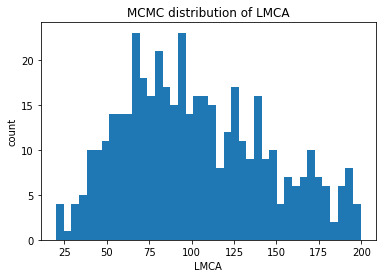

In [11]:
fig, ax = plt.subplots(1,1)

parname = 'LMCA' # << select from the list above
ax.hist(cbr_load[:,parameter_names.index(parname)],bins=40)
ax.set_title('MCMC distribution of {}'.format(parname))
ax.set_ylabel('count')
ax.set_xlabel(parname)

## Description of the output files (.bin), opening and viewing
There are multiple output files that contain the probability of runs (against cost function), fluxes, pools, and EDC states. By convention, these files are named as:

1. Fluxes - 'fluxfile' - carbon and water fluxes
2. Pools - 'poolfile' - pools, carbon and water states
3. EDCD pass/no pass - 'edcdfile' - pass/fail of EDCs
4. Probabilities from cost function - 'probfile' - probability as calculated from the cost function

For functions to convert these file outputs into netcdf files see tutorial 5 (maybe switch these with Sherlock).

### Flux and Pool Names

Output includes both fluxes and pools in the carbon cycle model. Each set of fluxes relates to a set of cardamom parameters. The forward run of CARDAMOM is simply one last run, same as done during iterations, to save out a final set of fluxes and pools. Generally carbon fluxes are stated in $gC/m^{2}/day$ while carbon pools are stated in $gC/m^{2}$. Water flux is stated in $kgH20/m^{2}/day$ and pools in $kgH20/m^{2}$.

In [12]:
#
## These pool and flux names are consistent with Firebucket related models

import outputnames

fluxnames = outputnames.fluxnames(output='longnames')
poolnames = outputnames.poolnames(output='longnames')

print('FLUXNAMES:')
print(os.linesep.join(fluxnames))
print('\n')
print('POOLNAMES:')
print(os.linesep.join(poolnames))


FLUXNAMES:
GPP
temprate (decomposition factor)*
respiration_auto (GPP -> autotrophic respiration)
leaf_production (GPP -> leaves)
labile_production (GPP -> labile)
root_production (GPP -> roots)
wood_production (GPP -> wood)
labile_release (Labile -> foliar)
leaffall_factor (leaf senescence factor)*
leaflitter_production (leaf -> litter)
woodlitter_production  (wood -> soil organic C)
rootlitter_production  (root -> litter)
respiration_het_litter (litter respiration)
respiration_het_som (SOM respiration)
litter2som (litter -> SOM)
labrelease_factor(leaf onset factor)*
Fires (total fire emissions)
Fires (fire C fluxes from Labile)
Fires (fire C fluxes from Foliar)
Fires (fire C fluxes from Root)
Fires (fire C fluxes from Wood)
Fires (fire C fluxes from Fine litter)
Fires (fire C fluxes from Soil organic matter)
Fires (C pool transfers, to litter and SOM pools)
Fires (C pool transfers, to litter and SOM pools)
Fires (C pool transfers, to litter and SOM pools)
Fires (C pool transfers, to 

In [27]:
# import the input data file
cbffile = dir_cbf+filename_cbf
cbrfile = dir_cbr+'demo/'+filename_cbr

filename_flux = 'fluxfile_test_1962_0.bin'
filename_pool = 'poolfile_test_1962_0.bin'
fluxfile = dir_output+'demo/'+filename_flux
poolfile = dir_output+'demo/'+filename_pool

# Load in fluxes and pools
CBR = rwbin.CARDAMOM_READ_OUTPUT(cbffile,cbrfile,fluxfile,poolfile)

# display
CBR # ensemble x time x variable

# CBR output file contains an unstructured array of fluxes and pools, 
# as well as some significant or dervied variables (i.e. LAI)

{'FLUXES': array([[[2.77598382e+00, 1.81079923e+00, 1.18886228e+00, ...,
          0.00000000e+00, 1.87779010e+00, 1.04892587e-01],
         [3.12464059e+00, 1.52202067e+00, 1.33818046e+00, ...,
          0.00000000e+00, 1.78135088e+00, 2.58091732e-01],
         [3.27206090e+00, 1.35220987e+00, 1.40131572e+00, ...,
          0.00000000e+00, 2.68070977e+00, 3.26235143e-01],
         ...,
         [6.47146746e-01, 1.26617223e+00, 2.77151598e-01, ...,
          0.00000000e+00, 7.57545474e-01, 4.49215743e-03],
         [5.79307276e-01, 1.38692448e+00, 2.48098192e-01, ...,
          0.00000000e+00, 7.00463367e-01, 2.64303543e-03],
         [7.99856672e-01, 1.39748302e+00, 3.42552221e-01, ...,
          0.00000000e+00, 8.48984251e-01, 3.61415671e-03]],
 
        [[3.29396820e+00, 1.48494971e+00, 1.41974111e+00, ...,
          0.00000000e+00, 1.88153043e+00, 6.17343216e-02],
         [3.52270792e+00, 1.41232119e+00, 1.51833077e+00, ...,
          0.00000000e+00, 1.69585130e+00, 1.60619511e-01

Text(0.5, 0, 'Time [months]')

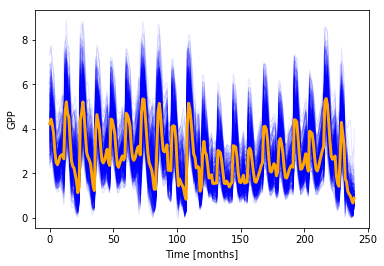

In [25]:
# Plot fluxes and pools
# Example: Plot each ensemble member in blue and the median in orange.

import numpy as np
fluxname = 'GPP'

data2plot = CBR['FLUXES'][:,:,fluxnames.index(fluxname)]

fig, ax = plt.subplots(1,1)
plt.plot(data2plot.T,color='blue',linewidth=1,alpha=.1,label='__nolabel__')
plt.plot(np.median(data2plot,axis=0),linewidth=3,color='orange',label='median')
ax.set_ylabel(fluxname)
ax.set_xlabel('Time [months]')
